# Use Case: Multi-Output Image Classification


### Overview
This project is a multi-output image classification task that uses the Vision Transformer (ViT) model to classify images into three classes: Quality, Rotation, and Mode. The Quality task has three subclasses: blur, torch and sharp. The Rotation task has four subclasses: 90_degrees_clockwise, 90_degrees_counterclockwise, 180_degrees, and no_rotation. The Mode task has two subclasses: RGB and BGR. The ViT model is pretrained on the ImageNet dataset and fine-tuned on a custom dataset to perform the multi-output classification task.

![arch](arch.png)


### Methodology
The methodology used in this project involves fine-tuning the ViT model on a custom dataset consisting of images in the three classes. The dataset used for this project is the Blur Dataset from Kaggle, which consists of images in the defocused_blurred, motion_blurred, and sharp classes. For the Rotation task, the sharp images were transformed into the four subclasses using OpenCV. For the Mode task, the sharp images were converted to BGR using OpenCV. The models were trained using PyTorch Lightning with the Adam optimizer and cross-entropy loss.

The project consists of three main parts: data preprocessing, model architecture, and training.

### Data Preprocessing
The custom dataset used for this project is the Blur Dataset from Kaggle. The dataset includes three classes: defocused_blurred, motion_blurred, and sharp. The dataset is preprocessed to create subclasses for each of the three main classes. The sharp images were used to create the sharp subclass for the quality task. For the rotation task, images were rotated to create subclasses: 90_degrees_clockwise, 90_degrees_counterclockwise, 180_degrees, and no_rotation. For the mode task, the sharp images were converted to BGR. All images were resized to 224x224 pixels and normalized using the mean and standard deviation of the ImageNet dataset.

### Model Architecture
The ViT model used for this project is the base model with patch size 16 and input size 224. The final layer was modified to output the correct number of classes for each task. The loss function used is cross-entropy loss.

### Training
The model was trained using PyTorch Lightning. The training process involved fine-tuning the pre-trained ViT model on the custom dataset. The dataset was split into training and validation sets, with a batch size of 8. The model was trained for 12 epochs using the Adam optimizer with a learning rate of 2e-5.

### Business Segments
This model can be useful in various business segments that involve image classification tasks, such as healthcare, automotive, and surveillance industries.



### AI Application
The objective of this project is to classify images into multiple classes using the ViT model. The models trained in this project can be useful for various image classification tasks in real-life scenarios. The input image is passed through the pre-trained ViT model, and the predicted output classes are returned. The model can be used to classify images in the Quality, Rotation, and Mode tasks.


### Data
The Blur Dataset from Kaggle was used to train the models. The dataset can be accessed from the following link: https://www.kaggle.com/datasets/kwentar/blur-dataset


### Papers
The following papers were referred to for this project:

- Attention is All You Need" by Vaswani et al. (2017)
- An Image is Worth 16x16 Words: Transformers for Image Recognition at Scale" by Dosovitskiy et al. (2020)
- Vision Transformers Explained" by Cunyuan et al. (2021)


### Demo link
Record a 1 min demo and kindly provide a link for this.


### Team
```
Solo
GitHub : https://github.com/KLAU-S
```

In [1]:
import json
import os
base_dir = os.getcwd()
from PIL import Image
from transformers import ViTFeatureExtractor, ViTForImageClassification

c:\notcdrive\allsoftinstallations\Anaconda\envs\heroda\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
image_path = os.path.join(base_dir, 'test', 'overex.jpeg')
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
inputs = feature_extractor(images=Image.open(image_path), return_tensors="pt")

c:\notcdrive\allsoftinstallations\Anaconda\envs\heroda\lib\site-packages\transformers\models\vit\feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [3]:
# qual_id2label = {0: 'defocus_blurred', 1: 'motion_blurred', 2 : 'sharp'}

quality_model_dir = os.path.join(base_dir, 'quality_model')
loaded_quality_model = ViTForImageClassification.from_pretrained(quality_model_dir)

#load id2label from config.json
with open(os.path.join(quality_model_dir, 'config.json')) as f:
    config = json.load(f)
qual_id2label = config['id2label']

# convert keys from string to integer
# current is like this : {'0': 'defocused_blurred', '1': 'motion_blurred', '2': 'sharp'}
# should be like this : {0: 'defocused_blurred', 1: 'motion_blurred', 2: 'sharp'}

json_dict = {int(k):v for k,v in qual_id2label.items()}
json_string = json.dumps(json_dict)


# Make quality prediction
outputs1 = loaded_quality_model(**inputs)
pred1 = outputs1.logits.argmax().item()

######################################################################################################

rotate_model_dir = os.path.join(base_dir, 'rotation_model')
loaded_rotate_model = ViTForImageClassification.from_pretrained(rotate_model_dir)
#load id2label from config.json
with open(os.path.join(rotate_model_dir, 'config.json')) as f:
    config = json.load(f)
rotate_id2label = config['id2label']

json_dict = {int(k):v for k,v in rotate_id2label.items()}
json_string = json.dumps(json_dict)

# Make rotation prediction
outputs2 = loaded_rotate_model(**inputs)
pred2 = outputs2.logits.argmax().item()

######################################################################################################

mode_model_dir = os.path.join(base_dir, 'mode_model')
loaded_mode_model = ViTForImageClassification.from_pretrained(mode_model_dir)
#load id2label from config.json
with open(os.path.join(mode_model_dir, 'config.json')) as f:
    config = json.load(f)
mode_id2label = config['id2label']

json_dict = {int(k):v for k,v in mode_id2label.items()}
json_string = json.dumps(json_dict)

# Make mode prediction
outputs3 = loaded_mode_model(**inputs)
pred3 = outputs3.logits.argmax().item()

######################################################################################################

print(f'Predicted quality: {qual_id2label[str(pred1)]}')
print(f'Predicted rotation: {rotate_id2label[str(pred2)]}')
print(f'Predicted mode: {mode_id2label[str(pred3)]}')

Predicted quality: torch
Predicted rotation: No_rotation
Predicted mode: RGB


In [6]:
def predict_model(model_dir, inputs, model_type):
    model = ViTForImageClassification.from_pretrained(model_dir)
    outputs = model(**inputs)
    pred = outputs.logits.argmax().item()
    
    if model_type == "quality":
        id2label = {0: 'blur', 1: 'sharp', 2: 'torch'}
    elif model_type == "rotation":
        id2label = {0: '180_degrees', 1: '90_degrees_clockwise', 2: '90_degrees_counterclockwise', 3: 'No_rotation'}
    elif model_type == "mode":
        id2label = {0: 'BGR', 1: 'RGB'}
    
    return id2label[pred]


# Make quality prediction
qual_pred = predict_model(os.path.join(base_dir, 'quality_model'), inputs, "quality")
print(f'Predicted quality: {qual_pred}')

# Make rotation prediction
rotate_pred = predict_model(os.path.join(base_dir, 'rotation_model'), inputs, "rotation")
print(f'Predicted rotation: {rotate_pred}')

# Make mode prediction
mode_pred = predict_model(os.path.join(base_dir, 'mode_model'), inputs, "mode")
print(f'Predicted mode: {mode_pred}')


Predicted quality: torch
Predicted rotation: No_rotation
Predicted mode: RGB


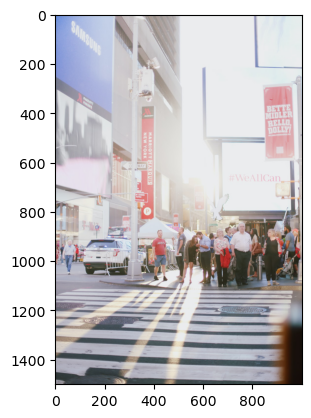

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(image_path)
imgplot = plt.imshow(img)
plt.show()